In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Accuracy 99.0 %


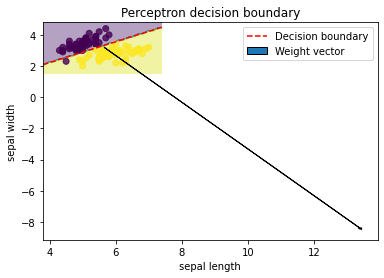

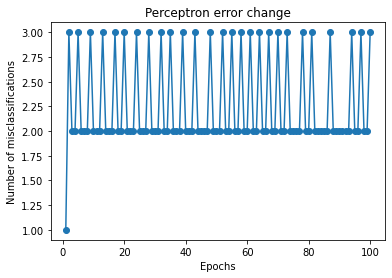

Final error: 3


In [33]:
# Import necessary libraries
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Define the input and output data for Setosa and Versicolor classes
X = iris.data[:100, (0,1)]  # use sepal length and width as input for first 100 rows
y = iris.target[:100]       # consider only first 100 rows, where 0 corresponds to Setosa and 1 to Versicolor
y[y == 0] = -1              # convert Setosa class label from 0 to -1

# Define the perceptron class
class Perceptron:
    def __init__(self, eta=0.1, n_iter=100):
        self.eta = eta                 # learning rate
        self.n_iter = n_iter           # number of iterations
        self.weights = None            # weights after fitting
        self.bias = None               # bias after fitting
        self.errors = []               # list to store number of misclassifications at each epoch
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # initialize weights to 0
        self.bias = 0                        # initialize bias to 0
        for _ in range(self.n_iter):
            error_count = 0
            for i in range(n_samples):
                linear_model = np.dot(X[i], self.weights) + self.bias  # calculate linear model output
                y_predicted = np.where(linear_model > 0, 1, -1)         # predict class label
                error = y[i] - y_predicted                              # calculate error
                self.weights += self.eta * error * X[i]                 # update weights
                self.bias += self.eta * error                            # update bias
                if error != 0:
                    error_count += 1
            self.errors.append(error_count)
                
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias  # calculate linear model output
        return np.where(linear_model > 0, 1, -1)             # predict class label
    
# Create a perceptron object and fit the data
perceptron = Perceptron()
perceptron.fit(X, y)
cr=0
total = len(X)
for x, label in zip(X, y):
    if perceptron.predict(x) == label:
        cr += 1
print("Accuracy",cr / total*100,'%')
# Plot the samples and decision boundary
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

# Plot the weight vector
w1, w2 = perceptron.weights
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
xvals = np.array([xmin, xmax])
yvals = -(xvals * w1 + perceptron.bias) / w2
plt.plot(xvals, yvals, '--', c='red', label='Decision boundary')

plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Perceptron decision boundary")
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
x1_mid = (x1_min + x1_max)/2
x2_mid = (x2_min + x2_max)/2
plt.arrow(x1_mid,x2_mid, w1, w2, head_width=0.1, head_length=0.1, label='Weight vector')
plt.legend()
plt.show()

# Plot the error change graph
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron error change')
plt.show()

# Print the final error value
print("Final error:", perceptron.errors[-1])
